# This notebook performs Supervised Machine Learning on the Iris Dataset. It consists of eight sections.


## 1. Import required libraries

In [ ]:
# Import required Scikit-learn modules and Pandas and Matplotlib libraries.

from sklearn import datasets

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 2. Load the Dataset, check features, and targets.

In [ ]:
# Import the Iris dataset from the scikit-learn library.

data = datasets.load_iris()

In [ ]:
# Print the names of the features in the Iris dataset.

print(data["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Print the target values of the Iris dataset.

print(data["target_names"])

['setosa' 'versicolor' 'virginica']


In [ ]:
# Print the names of the target classes in the Iris dataset.

print(data["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Print the shape of the target array.

print(data["target"].shape)

(150,)


## 3. Make Pandas DataFrame and visualise it using Matplotlib

In [ ]:
# Create a Pandas DataFrame (df) from the "data" key of the loaded Iris dataset.

df = pd.DataFrame(data["data"], columns = data["feature_names"])
#df = df[['petal length (cm)', 'petal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'petal width (cm)')

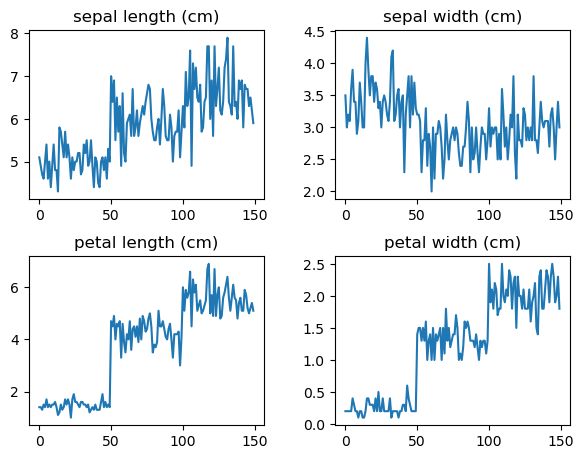

In [ ]:
# Draw 2x2 subplot and show the line graph for each of four attributes.

fig, ax =plt.subplots(2,2)
fig.tight_layout(pad=2)
ax[0, 0].plot(df["sepal length (cm)"])
ax[0, 0].set_title("sepal length (cm)")

ax[0, 1].plot(df["sepal width (cm)"])
ax[0, 1].set_title("sepal width (cm)")

ax[1, 0].plot(df["petal length (cm)"])
ax[1, 0].set_title("petal length (cm)")

ax[1, 1].plot(df["petal width (cm)"])
ax[1, 1].set_title("petal width (cm)")

In [ ]:
# Draw 1x2 subplot and show the line graph for each of two attributes.

#fig, ax = plt.subplots(1, 2)
#fig.tight_layout(pad=2)

#ax[0].plot(df["petal length (cm)"])
#ax[0].set_title("petal length (cm)")

#ax[1].plot(df["petal width (cm)"])
#ax[1].set_title("petal width (cm)")


In [ ]:
# Add "target" column in DataFrame to associate each sample with its target class.

df["target"] = data["target"]

In [ ]:
# Calculate and display the count of each unique value in the "target" column.
# Also, display the datatype of "target" column.

# Note:
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
# Display the first 5 rows (four features and target class).

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Display the last 5 rows (four features and target class).

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Find the top features using Pearson Correlation method.

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Get the correlation values with respect to the target column
target_correlations = correlation_matrix['target'].drop('target')

# Get the top 4 correlations (positive and negative) with respect to the target
top_4_target_corr = target_correlations.nlargest(4)

# Print the top 4 correlations with respect to the target along with their corresponding columns
for column, correlation_value in top_4_target_corr.items():
    print(f"Correlation between '{column}' and 'target': {correlation_value:.4f}")

Correlation between 'petal width (cm)' and 'target': 0.9565
Correlation between 'petal length (cm)' and 'target': 0.9490
Correlation between 'sepal length (cm)' and 'target': 0.7826
Correlation between 'sepal width (cm)' and 'target': -0.4267


#### We can see that the petal length and petal width features have the highest correlation with the class label. It is 0.949 and 0.956 respectively. This means that these two features are the most important features for predicting the class label.

## 4. Create a Training/Testing Dataset and Peek into it


In [ ]:
# Create a new DataFrame X by removing the "target" column from the original DataFrame df.
# X respresents the four features.

X = df.drop("target",axis=1)

In [ ]:
# Assign the "target" column of the DataFrame df to the variable y.
# y represents the target class or label

y = df["target"]

In [ ]:
# Returns the number of elements (size) in the Series y.

y.size

150

In [ ]:
# Split the data (X and y) into training and testing sets using train_test_split function,
# with 60% for training and 40% for testing. Use 42 as a seed for the random number generator.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Returns the number of elements (size) in the Series y_train.

y_train.size

90

In [ ]:
# Returns the number of elements (size) in the Series y_test.

y_test.size

60

In [ ]:
# Print the training set X_train.

print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
123                6.3               2.7                4.9               1.8
24                 4.8               3.4                1.9               0.2
25                 5.0               3.0                1.6               0.2
23                 5.1               3.3                1.7               0.5
94                 5.6               2.7                4.2               1.3
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[90 rows x 4 columns]


In [ ]:
# Print the testing set X_test.

print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
31                 5.4               3.4                1.5               0.4
64                 5.6               2.9                3.6               1.3
141                6.9               3.1                5.1               2.3
68                 6.2               2.2                4.5               1.5
82                 5.8               2.7                3.9               1.2
110                6.5               3.2                5.1               2.0
12                 4.8               3.0                1.4     

## 5. Scale features between the range [0,1] and Peek into it

In [ ]:
# Create an instance of the MinMaxScaler, a feature scaling technique that scales features to a specified range,
# often between 0 and 1.
scaler = MinMaxScaler()

# Fit the scaler on the training data (X_train) and then transforms it, ensuring that the features are scaled according
# to the specified range.
X_train = scaler.fit_transform(X_train)

# Transform the testing data (X_test) using the same scaling parameters derived from the training data, maintaining
# consistency in the scaling between training and testing data.
X_test = scaler.transform(X_test)

In [ ]:
# Print the scaled training set X_train.

print(X_train)

[[0.58823529 0.25       0.67857143 0.70833333]
 [0.14705882 0.6        0.14285714 0.04166667]
 [0.20588235 0.4        0.08928571 0.04166667]
 [0.23529412 0.55       0.10714286 0.16666667]
 [0.38235294 0.25       0.55357143 0.5       ]
 [0.23529412 0.6        0.07142857 0.04166667]
 [0.41176471 0.4        0.55357143 0.45833333]
 [1.         0.8        1.         0.875     ]
 [0.08823529 0.5        0.05357143 0.04166667]
 [0.55882353 0.35       0.57142857 0.5       ]
 [0.41176471 0.15       0.69642857 0.79166667]
 [0.35294118 1.         0.05357143 0.04166667]
 [0.5        0.4        0.66071429 0.70833333]
 [0.44117647 0.25       0.71428571 0.75      ]
 [0.5        0.         0.51785714 0.375     ]
 [0.32352941 0.4        0.60714286 0.58333333]
 [0.55882353 0.6        0.76785714 0.91666667]
 [0.35294118 0.05       0.51785714 0.5       ]
 [0.32352941 0.85       0.10714286 0.125     ]
 [0.20588235 0.05       0.39285714 0.375     ]
 [0.61764706 0.25       0.75       0.75      ]
 [0.20588235 

In [ ]:
# Print the scaled testing set X_test.

print(X_test)

[[ 0.52941176  0.3         0.64285714  0.45833333]
 [ 0.41176471  0.8         0.10714286  0.08333333]
 [ 1.          0.2         1.03571429  0.91666667]
 [ 0.5         0.35        0.60714286  0.58333333]
 [ 0.73529412  0.3         0.66071429  0.54166667]
 [ 0.32352941  0.6         0.07142857  0.125     ]
 [ 0.38235294  0.35        0.44642857  0.5       ]
 [ 0.76470588  0.45        0.71428571  0.91666667]
 [ 0.55882353  0.          0.60714286  0.58333333]
 [ 0.44117647  0.25        0.5         0.45833333]
 [ 0.64705882  0.5         0.71428571  0.79166667]
 [ 0.14705882  0.4         0.05357143  0.        ]
 [ 0.35294118  0.65        0.03571429  0.04166667]
 [ 0.17647059  0.45        0.07142857  0.        ]
 [ 0.23529412  0.8         0.07142857  0.08333333]
 [ 0.58823529  0.55        0.64285714  0.625     ]
 [ 0.64705882  0.4         0.83928571  0.875     ]
 [ 0.38235294  0.15        0.5         0.41666667]
 [ 0.41176471  0.3         0.60714286  0.5       ]
 [ 0.61764706  0.3         0.80

## 6. Apply Machine Learning Algorithms on Scaled Dataset


### Logistic Regression

In [ ]:
# Apply Logistic Regression on the Iris dataset.

# Initialize a logistic regression classifier with the "multinomial" option for multi-class classification.
lr= LogisticRegression(multi_class="multinomial")

# Train the logistic regression model on the training data (X_train for features and y_train for labels).
lr.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred =lr.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9166666666666666

Confusion Matrix: 

[[23  0  0]
 [ 0 15  4]
 [ 0  1 17]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      0.79      0.86        19
           2       0.81      0.94      0.87        18

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



### Support Vector Machine

In [ ]:
# Apply Support Vector Machine on the Iris dataset.

# Initialize a Linear Support Vector Classifier (SVC) model for multi-class classification.
svm = LinearSVC()

# Train the LinearSVC model on the training data (X_train for features and y_train for labels).
svm.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred = svm.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9

Confusion Matrix: 

[[23  0  0]
 [ 0 14  5]
 [ 0  1 17]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.74      0.82        19
           2       0.77      0.94      0.85        18

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.91      0.90      0.90        60



### Random Forest

In [ ]:
# Apply Random Forest on the Iris dataset.

# Initialize a Random Forest Classifier, an ensemble learning method that combines multiple decision trees to improve
# classification accuracy.
forest = RandomForestClassifier()

# Train the Random Forest Classifier on the training data (X_train for features and y_train for labels).
forest.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred = forest.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9833333333333333

Confusion Matrix: 

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



###  From the obtainined accuracy results,we can see that –  
    
    The Logistic Regression model achieved around 91.67% accuracy, while the Linear Support Vector Classifier attained 90%.
    The Random Forest model excelled, achieving an accuracy of roughly 98.33%.
    Higher accuracy typically reflects superior performance. Notably, the Random Forest model outperformed others exhibiting the highest accuracy among the three, implying its effectiveness in this context.

## 7. Optimize the Results


In [ ]:
# Perform Grid Search on Support Vector Machine to optimize its performance.

# Create a parameter grid for the GridSearchCV object
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100000, 1000000],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LinearSVC(), param_grid=param_grid)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100000, 1000000]})

In [ ]:
# Print the best estimator found by the GridSearchCV object.

print(grid_search.best_estimator_)

LinearSVC(C=10, max_iter=100000)


In [ ]:
# Make predictions on the test data.

pred = grid_search.predict(X_test)

In [ ]:
# Print the accuracy score.

print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.9833333333333333


In [ ]:
# Print the confusion matrix.

print('Confusion matrix: \n')
print(confusion_matrix(y_test, pred))

Confusion matrix: 

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [ ]:
# Print the classification report.

print('Classification report:\n')
print(classification_report(y_test, pred))

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



###  From the obtainined accuracy results of Linear SVC before and after grid search, we can see that –  
    
    The Linear Support Vector Classifier (Linear SVC) attained 90% accuracy for the default values (i.e. C = 1).
    The Linear SVC attained 98.33% accuracy after grid search with C=10 and max_iter=100000.

## 8. Run Predictions on Optimized Model


In [ ]:
# Input user values for the four features.

sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

Enter sepal length (cm): 5.9
Enter sepal width (cm): 3.0
Enter petal length (cm): 5.1
Enter petal width (cm): 1.8


In [ ]:
# Create a feature vector from user input.
user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

# Use the trained model to predict the flower type.
predicted_class = grid_search.predict(user_input)

# Map the predicted class index to the corresponding class name.
predicted_class_name = data.target_names[predicted_class][0]

print(f"The predicted flower type is: {predicted_class_name}")

The predicted flower type is: virginica


# Exercises

    1.) In section 5 of the notebook, feature scaling is performed. Comment out this section and rerun the notebook.
    Check if feature scaling makes any difference on the performance of the three machine learning algorithms (linear
    regression, support vector machines, and random forest) used in the notebook. Note down the obtained results, including the accuracy, precision, recall, & F1-score of the machine learning algorithms in the provided excel sheet.
    
    2.) In notebook, the dataset is divided into 60% training data and 40% testing data. Rerun the notebook for a different split of the dataset, such as 70% training data and 30% testing data.  You should also scale the features. Note down the results, including the accuracy, precision, recall, & F1-score of the machine learning algorithms in the provided excel sheet.

    3.) The Iris dataset has four features: sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm).
    The Pearson Correlation test of the dataset shows that petal length and petal width features have a highest correlation with the class label.
    This means that these two features are the most important for predicting the class label. How the three machine learning algorithms will behave if only these two features are given? You should also scale the features & use a 60% training and 40% testing split.
    You can do this by removing the comment from following line in section 3:
   
    -- df = df[['petal length (cm)', 'petal width (cm)']]
    
    Also, You should comment out the code that plots the four features and uncomment the code that plots the two features.
    You should also note down the results of the machine learning algorithms, including the accuracy, precision, recall, and F1-score in the provided excel sheet.